# Tarea Curso de introducción al análisis de datos con Python

# Listado de Preguntas
1.  Mostrar en consola el nombre de todos los usuarios que no poseen un correo electronico.
2.  Listar el nombre y correo del usuario mas joven de Canada
3.  Listar el nombre y correo de los usuarios mas jovenes de Germany y Canada
4.  Listar los 5 países con **menor** cantidad de usuarios.
5. Obtener el país con mas usuarios.
6. Obtener el país con mas usuarios cuya edad sea mayor a 50
7. Obtener la suma total de todos los usuarios de Canada y Germany
8. Mostrar en consola la cantidad de paises en el dataset
9. Obtener el promedio de edad de cada uno de los paises.
10. Mostrar en consola el país con más hombres



In [1]:
import pandas as pd
import numpy as np

In [10]:
# URL REPO bootcamp
url = "https://raw.githubusercontent.com/MayumyCH/bootcamp_ciencia_de_datos/main/modulos/02.%20Intro%20al%20computo%20cientifico/datasets/user.csv"  
# url = '/content/user.csv' # Desde google Colab
data = pd.read_csv(url, index_col=0)
# data = data.dropna()

In [13]:
# data.describe()
# data.info()

In [4]:
data.head(3)

,name,age,gender,country,email
id,,,,,
0,Mr Jerome Thomas,NaN,male,United States,NaN
1,NaN,70.0,male,NaN,NaN
2,Mr Noham Dubois,40.0,male,France,noham.dubois@example.com


In [5]:
# Revisar cuantos nulos tengo en las variables
data.isna().sum().sort_values(ascending=False)

email      2
name       1
age        1
country    1
gender     0
dtype: int64

# Resolución

### 1.  Mostrar en consola el nombre de todos los usuarios que no poseen un correo electronico.


In [14]:
data[data['email'].isnull()]['name']

id
0    Mr Jerome Thomas
1                 NaN
Name: name, dtype: object

In [19]:
# data[pd.isna(data["email"])] # Antonio Feregrino
# data[pd.isna(data["email"])]['name']
# data[data['email'].isna()]

### 2.  Listar el nombre y correo del usuario mas joven de Canada


In [8]:
data.query('country == "Canada"').sort_values("age")[['name','age','email']].head(1)
data[data['country']== "Canada"].sort_values("age")[['name','age','email']].head(1)

,name,age,email
id,,,
184,Mr Philip Bélanger,24.0,philip.belanger@example.com


In [21]:
# Funcion retorna nombre y el email de la persona más joven de un país
def mas_joven_pais(df, pais):
    edad_joven = df[df['country'] == pais].age.min()
    joven = df[(df['country'] == pais) & (df['age'] == edad_joven)].loc[:,['name', 'email']]
    return joven

In [23]:
canadiense = mas_joven_pais(data, 'Canada')
canadiense

,name,email
id,,
184,Mr Philip Bélanger,philip.belanger@example.com


## 3.  Listar el nombre y correo de los usuarios mas jovenes de Germany y Canada


In [51]:
# data[(data['country'].isin(["Germany","Canada"]))].sort_values("age")[['name','age','country']]
data.query('country in ("Germany","Canada")').sort_values("age")[['name','age','country']]

,name,age,country
id,,,
88,Mrs Hilda Epp,22.0,Germany
184,Mr Philip Bélanger,24.0,Canada
20,Mr Vincenzo Rauscher,25.0,Germany
170,Mr Ryder Côté,25.0,Canada
72,Ms Megan Brown,26.0,Canada
131,Mr Xavier Addy,30.0,Canada
85,Mrs Luisa Weißmann,32.0,Germany
50,Mr Theo Miller,33.0,Canada
158,Mr Rafael Spangenberg,33.0,Germany


In [25]:
aleman = mas_joven_pais(data, 'Germany')
result = pd.concat([canadiense, aleman])
result

,name,email
id,,
184,Mr Philip Bélanger,philip.belanger@example.com
88,Mrs Hilda Epp,hilda.epp@example.com


## 4.  Listar los 5 países con mayor cantidad de usuarios.

In [61]:
# data.groupby('country')['country'].agg('count').sort_values(ascending=False).head(5)
data.value_counts(data['country']).head(5)

country
Ireland           16
Denmark           16
United Kingdom    14
Norway            14
New Zealand       14
dtype: int64

## 5. Obtener el país con mas usuarios.

In [62]:
data.value_counts(data['country']).head(1)

country
Ireland    16
dtype: int64

## 6. Obtener el país con mas usuarios cuya edad sea mayor a 50

In [70]:
df= data[(data['age']>50)]

# df.groupby('country')['country'].count().sort_values(ascending=False).head(1)
df.value_counts(data['country']).head(1)

country
Iran    10
dtype: int64

## 7. Obtener la suma total de todos los usuarios de Canada y Germany

In [78]:
# df = data[data['country'].isin(["Germany","Canada"])]

# df.value_counts(data['country']).head()
df.groupby('country')['country'].count()

country
Canada     12
Germany     9
Name: country, dtype: int64

## 8. Mostrar en consola la cantidad de paises en el dataset

In [84]:
# data.groupby('country')['country'].count()
data.value_counts(data['country'])

country
Ireland           16
Denmark           16
United Kingdom    14
Norway            14
New Zealand       14
Spain             13
Iran              13
Canada            12
Australia         12
Turkey            12
France            10
Finland           10
United States     10
Germany            9
Switzerland        9
Brazil             9
Netherlands        6
dtype: int64

In [241]:
len(data['country'].value_counts())

17

## 9. Obtener el promedio de edad de cada uno de los paises.

In [242]:
data.groupby('country')['age'].mean()

country
Australia         51.166667
Brazil            50.666667
Canada            38.583333
Denmark           48.812500
Finland           42.200000
France            48.900000
Germany           39.555556
Iran              54.230769
Ireland           42.000000
Netherlands       51.833333
New Zealand       49.071429
Norway            46.071429
Spain             56.615385
Switzerland       44.000000
Turkey            47.000000
United Kingdom    50.142857
United States     51.333333
Name: age, dtype: float64

In [93]:
data.groupby('country').agg({'age': ['mean', 'max', 'count']})

age            
                     mean   max count
country                              
Australia       51.166667  75.0    12
Brazil          50.666667  70.0     9
Canada          38.583333  60.0    12
Denmark         48.812500  72.0    16
Finland         42.200000  66.0    10
France          48.900000  75.0    10
Germany         39.555556  64.0     9
Iran            54.230769  71.0    13
Ireland         42.000000  70.0    16
Netherlands     51.833333  62.0     6
New Zealand     49.071429  75.0    14
Norway          46.071429  67.0    14
Spain           56.615385  74.0    13
Switzerland     44.000000  67.0     9
Turkey          47.000000  74.0    12
United Kingdom  50.142857  70.0    14
United States   51.333333  75.0     9

## 10. Mostrar en consola el país con más hombres

In [107]:
data[data['gender']=='male'].groupby('country')['country'].count(
).sort_values(ascending=False).head(3)

country
Ireland    10
Norway      8
Iran        8
Name: country, dtype: int64

# ADICIONAL PREGUNTA

## 11) Porcentaje de hombres y mujeres por país

In [26]:
# Calculamos en total de hombres y mujeres por país, así como el total de personas
# Creamos un nuevo DF a partir de las 3 series calculadas

total = data.groupby('country').count().name
n_hombres = data[data['gender'] == 'male'].groupby('country').count().name
n_mujeres = data[data['gender'] == 'female'].groupby('country').count().name

generos = pd.concat([n_hombres, n_mujeres, total], axis=1)
generos.columns=['hombres', 'mujeres', 'total']

generos

,hombres,mujeres,total
country,,,
Australia,6,6,12
Brazil,4,5,9
Canada,7,5,12
Denmark,4,12,16
Finland,3,7,10
France,6,4,10
Germany,3,6,9
Iran,8,5,13
Ireland,10,6,16


In [27]:
# Aplicamos la función porcentaje a cada línea

def porcentaje(x, y):
    return round((y * 100 / x), 1)

generos['% hombres'] = generos.apply(lambda row: porcentaje(row['total'],
                     row['hombres']), axis = 1)

generos['% mujeres'] = generos.apply(lambda row: porcentaje(row['total'],
                     row['mujeres']), axis = 1)

generos

,hombres,mujeres,total,% hombres,% mujeres
country,,,,,
Australia,6,6,12,50.0,50.0
Brazil,4,5,9,44.4,55.6
Canada,7,5,12,58.3,41.7
Denmark,4,12,16,25.0,75.0
Finland,3,7,10,30.0,70.0
France,6,4,10,60.0,40.0
Germany,3,6,9,33.3,66.7
Iran,8,5,13,61.5,38.5
Ireland,10,6,16,62.5,37.5


## 12) Total de hombres y mujeres en el DF

In [28]:
hombres = generos['hombres'].sum()
mujeres = generos['mujeres'].sum()
total = generos['total'].sum()

totales = {
    'hombres': hombres,
    'mujeres': mujeres,
    'total': total,
    '% hombres': porcentaje(total, hombres),
    '% mujeres': porcentaje(total, mujeres),
}

# Se agrega una serie para poder conservar el índice de países
# Si se agrea el diccionario directamente, entonces
# ignore_index=True siempre, y se pierden los índices
linea_totales = pd.Series(totales, name='Totales')

generos = generos.append(linea_totales, ignore_index=False)

generos

,hombres,mujeres,total,% hombres,% mujeres
country,,,,,
Australia,6.0,6.0,12.0,50.0,50.0
Brazil,4.0,5.0,9.0,44.4,55.6
Canada,7.0,5.0,12.0,58.3,41.7
Denmark,4.0,12.0,16.0,25.0,75.0
Finland,3.0,7.0,10.0,30.0,70.0
France,6.0,4.0,10.0,60.0,40.0
Germany,3.0,6.0,9.0,33.3,66.7
Iran,8.0,5.0,13.0,61.5,38.5
Ireland,10.0,6.0,16.0,62.5,37.5


In [35]:
# OTRA SOLUCION
def percent(x, y):
    return x/x.sum()

data['num'] = 1
data_percent = pd.pivot_table(data,
                             index='country',
                             columns='gender',
                             values='num',
                             aggfunc='count').reset_index()

data_percent['% female'] = data_percent[['female','male']].apply(lambda x:x.female/sum(x), axis=1)
data_percent['% male'] = data_percent[['female','male']].apply(lambda x:x.male/sum(x), axis=1)
data_percent

gender,country,female,male,% female,% male
0,Australia,6,6,0.500000,0.500000
1,Brazil,5,4,0.555556,0.444444
2,Canada,5,7,0.416667,0.583333
3,Denmark,12,4,0.750000,0.250000
4,Finland,7,3,0.700000,0.300000
5,France,4,6,0.400000,0.600000
6,Germany,6,3,0.666667,0.333333
7,Iran,5,8,0.384615,0.615385
8,Ireland,6,10,0.375000,0.625000
9,Netherlands,4,2,0.666667,0.333333


In [37]:
# OTRA FORMA
agrupacion = data.groupby("country")
df_1 = agrupacion.aggregate(
    edad_min=("age",min),
    edad_max=("age",max),
    edad_mean=("age",lambda h:np.mean(h)),
    edad_std = ("age", lambda h:np.std(h)),
    porcentaje_mujeres = ("gender", lambda h:(h[h=="male"].size/h.size)*100),
    porcentaje_hombres= ("gender", lambda h:(h[h=="female"].size/h.size)*100),
    primer_usuario = ("name","first")
)
df_1

,edad_min,edad_max,edad_mean,edad_std,porcentaje_mujeres,porcentaje_hombres,primer_usuario
country,,,,,,,
Australia,23.0,75.0,51.166667,17.714558,50.000000,50.000000,Ms Cathy Simmmons
Brazil,27.0,70.0,50.666667,16.020820,44.444444,55.555556,Ms Laica Pires
Canada,24.0,60.0,38.583333,11.729296,58.333333,41.666667,Mr Louis Ross
Denmark,29.0,72.0,48.812500,13.234513,25.000000,75.000000,Mrs Naja Johansen
Finland,22.0,66.0,42.200000,14.668333,30.000000,70.000000,Miss Emilia Laitinen
France,27.0,75.0,48.900000,17.160711,60.000000,40.000000,Mr Noham Dubois
Germany,22.0,64.0,39.555556,13.508114,33.333333,66.666667,Mr Harri Althoff
Iran,27.0,71.0,54.230769,10.962551,61.538462,38.461538,Mr محمدمهدی سهيلي راد
Ireland,23.0,70.0,42.000000,14.611639,62.500000,37.500000,Mr Jakob Russell


## 13) Cantidad de personas por grupo de edad y país:

<AxesSubplot:xlabel='age'>

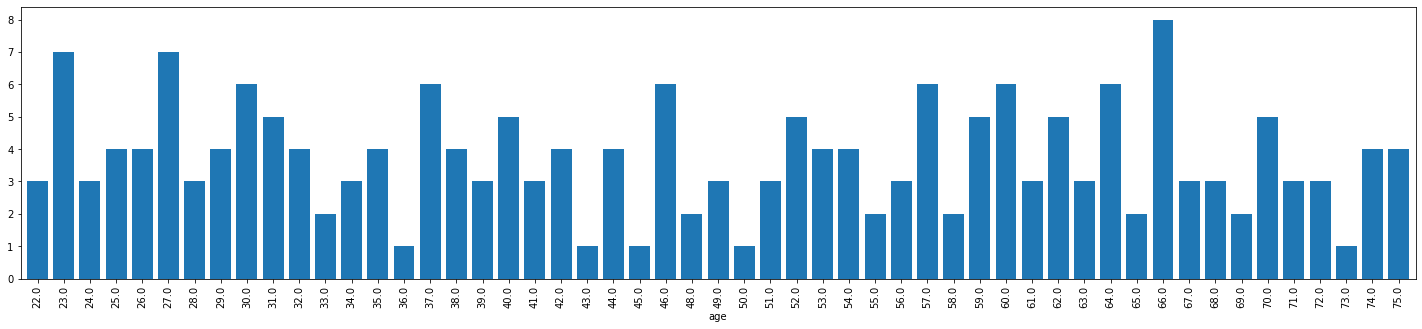

In [30]:
# Para determinar los grupos de edad más idóneos, podemos calular la cantidad de usuarios por edad y hacer una grafica para tener una idea de la distribución
import matplotlib.pyplot as plt

edades = data.groupby('age').count().name

edades.plot(kind='bar', width=0.8, figsize=(25,5))

In [31]:
grupo_1 = data[data['age'] <= 35].groupby('country').count().name
grupo_2 = data[(data['age'] > 35) & (data['age'] <= 55)].groupby('country').count().name
grupo_3 = data[(data['age'] > 55) & (data['age'] <= 65)].groupby('country').count().name
grupo_4 = data[data['age'] > 65].groupby('country').count().name

grupo_edades = pd.concat([grupo_1, grupo_2, grupo_3, grupo_4], axis=1).fillna(0).astype('int8')

grupo_edades.columns=['Menor 35', 'Entre 36 y 55', 'Entre 56 y 65', 'Mayor de 65']

grupo_edades

,Menor 35,Entre 36 y 55,Entre 56 y 65,Mayor de 65
country,,,,
Australia,4,3,2,3
Brazil,2,3,1,3
Canada,6,4,2,0
Denmark,2,7,5,2
Finland,4,4,1,1
France,3,3,2,2
Germany,5,2,2,0
Iran,1,6,4,2
Ireland,7,5,3,1


<AxesSubplot:xlabel='country'>

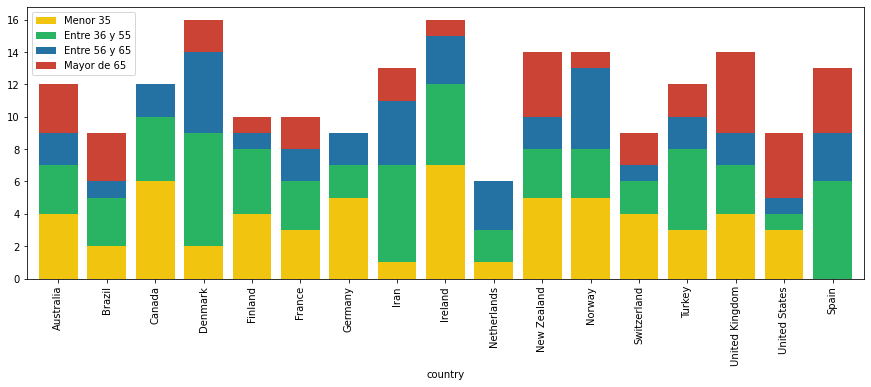

In [32]:
colores = ['#F1C40F', '#28B463', '#2471A3', '#CB4335']

grupo_edades.plot(kind='bar', width=0.8, figsize=(15,5), stacked='True', color=colores)

# ADICIONAL PREGUNTA DEL GRUPO DE TELEGRAM


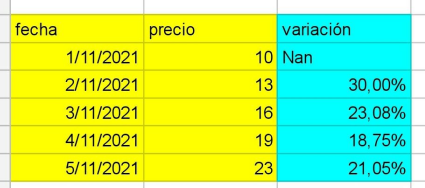

In [237]:
# PREGUNTA ARIEL
# Tengo el dataframe en  olor amarillo y quiero una nueva columna 
# que calcule las variaciones porcentuales... 
# debería tener algo como la imagen

import pandas as pd
import numpy as np

dic = {
    'fecha':['1/11/2021','2/11/2021','3/11/2021','4/11/2021','5/11/2021'],
    'fechaM':['30.11.2020_','30.11.2020_','28.12.2020_','25.01.2021_','15.02.2021_'],
    'precio':[10,13,16,19,23],
    'count':[10,'3/2','16','19',23]
}
df=pd.DataFrame(dic)
df

,fecha,fechaM,precio,count
0,1/11/2021,30.11.2020_,10,10
1,2/11/2021,30.11.2020_,13,3/2
2,3/11/2021,28.12.2020_,16,16
3,4/11/2021,25.01.2021_,19,19
4,5/11/2021,15.02.2021_,23,23


In [149]:
df["variacion"] = df.precio.pct_change()
df

,fecha,precio,count,variacion
0,1/11/2021,10,10,NaN
1,2/11/2021,13,3/2,0.300000
2,3/11/2021,16,16,0.230769
3,4/11/2021,19,19,0.187500
4,5/11/2021,23,23,0.210526


In [150]:
# df.info()

In [168]:
# PREGUNTA DE VANESA 
# CONVERTIR UNA VARIABLE EN NUMERICA
# Es objeto
df["count"].dtype

dtype('O')

In [170]:
df["count"][1]=3
change = pd.to_numeric(df["count"])
change.dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


dtype('int64')

In [171]:
change = df["count"].astype('float')
change.dtype

dtype('float64')

In [172]:
change = df["count"].apply(lambda x: float(x))
change.dtype

dtype('float64')

In [173]:
# fractions es un módulo de la librería estándar para hacer cálculos con fracciones.
from fractions import Fraction
change = df["count"].apply(lambda x: float(Fraction(x)))
change.dtype

dtype('float64')

**eval** es una función muy poderosa pero que hay que usar con cuidado porque evalúa cualquier expresión de Python. Por ejemplo en una aplicación web te pueden hacer inyección de código

In [158]:
# change = df["count"].apply(lambda x: eval(x))

In [175]:
fraccion = '3/2'
newValue = fraccion[:fraccion.find("/")]
newValue

'3'

In [238]:
df

,fecha,fechaM,precio,count
0,1/11/2021,30.11.2020_,10,10
1,2/11/2021,30.11.2020_,13,3/2
2,3/11/2021,28.12.2020_,16,16
3,4/11/2021,25.01.2021_,19,19
4,5/11/2021,15.02.2021_,23,23


In [239]:
# Cambiar formato de fecha
from datetime import datetime
df["fechaM2"] = df["fechaM"].apply(lambda x:datetime.strptime(x.replace('_',''),'%d.%m.%Y').date())

In [240]:
df

,fecha,fechaM,precio,count,fechaM2
0,1/11/2021,30.11.2020_,10,10,2020-11-30
1,2/11/2021,30.11.2020_,13,3/2,2020-11-30
2,3/11/2021,28.12.2020_,16,16,2020-12-28
3,4/11/2021,25.01.2021_,19,19,2021-01-25
4,5/11/2021,15.02.2021_,23,23,2021-02-15
